In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

#Preprocessing

In [4]:
data=pd.read_csv("/content/drive/MyDrive/datacar/autoscout.csv")
data.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7,3,2,66,1,Metallic,Cloth,Automatic,1422,1220,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7,2,1,141,0,Metallic,Cloth,Automatic,1798,1255,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7,3,1,85,0,Metallic,Cloth,Automatic,1598,1135,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6,3,1,66,0,Metallic,Cloth,Automatic,1422,1195,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7,3,1,66,1,Metallic,Cloth,Automatic,1422,1135,front,4.1


In [5]:
data.shape

(15915, 19)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make_model       15915 non-null  object 
 1   body_type        15915 non-null  object 
 2   price            15915 non-null  int64  
 3   vat              15915 non-null  object 
 4   km               15915 non-null  float64
 5   Type             15915 non-null  object 
 6   Fuel             15915 non-null  object 
 7   Gears            15915 non-null  int64  
 8   age              15915 non-null  int64  
 9   Previous_Owners  15915 non-null  int64  
 10  hp_kW            15915 non-null  int64  
 11  Inspection_new   15915 non-null  int64  
 12  Paint_Type       15915 non-null  object 
 13  Upholstery_type  15915 non-null  object 
 14  Gearing_Type     15915 non-null  object 
 15  Displacement_cc  15915 non-null  int64  
 16  Weight_kg        15915 non-null  int64  
 17  Drive_chain 

In [7]:
print(data.isnull().sum())

make_model         0
body_type          0
price              0
vat                0
km                 0
Type               0
Fuel               0
Gears              0
age                0
Previous_Owners    0
hp_kW              0
Inspection_new     0
Paint_Type         0
Upholstery_type    0
Gearing_Type       0
Displacement_cc    0
Weight_kg          0
Drive_chain        0
cons_comb          0
dtype: int64


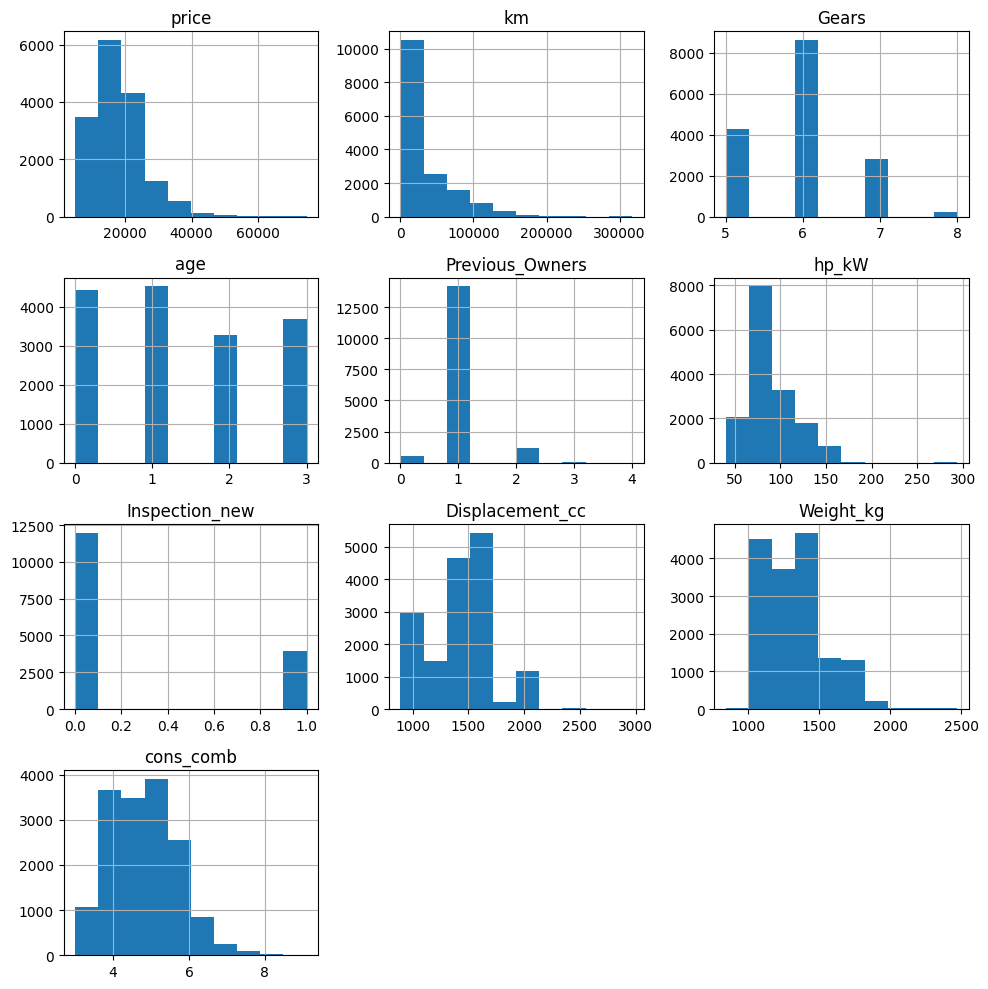

In [8]:
data.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

###Box Plots

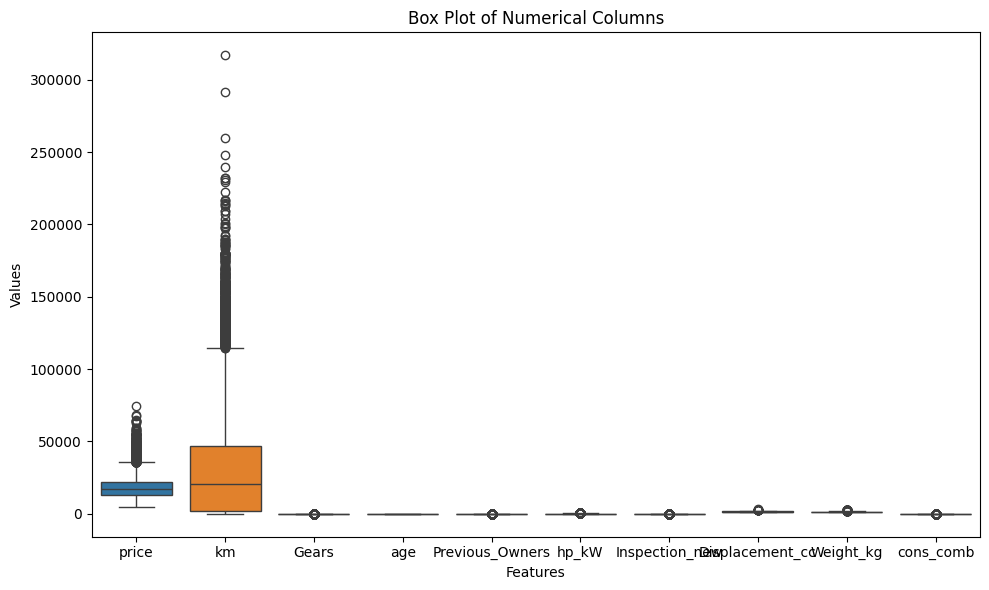

In [9]:
numerical_columns = data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numerical_columns])
plt.title('Box Plot of Numerical Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Boxplot without Outliers')

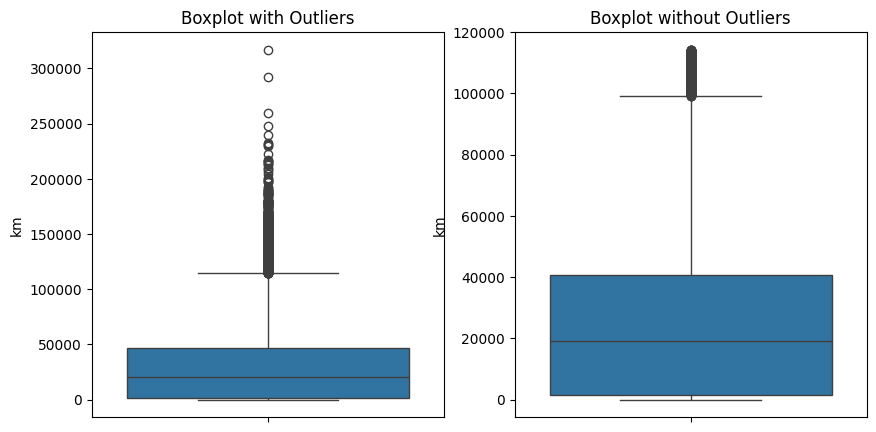

In [10]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=data['km'])
plt.title('Boxplot with Outliers')
Q1 = data['km'].quantile(0.25)
Q3 = data['km'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['km'] >= lower_bound) & (data['km'] <= upper_bound)]
plt.subplot(1, 2, 2)
sns.boxplot(data=data['km'])
plt.title('Boxplot without Outliers')


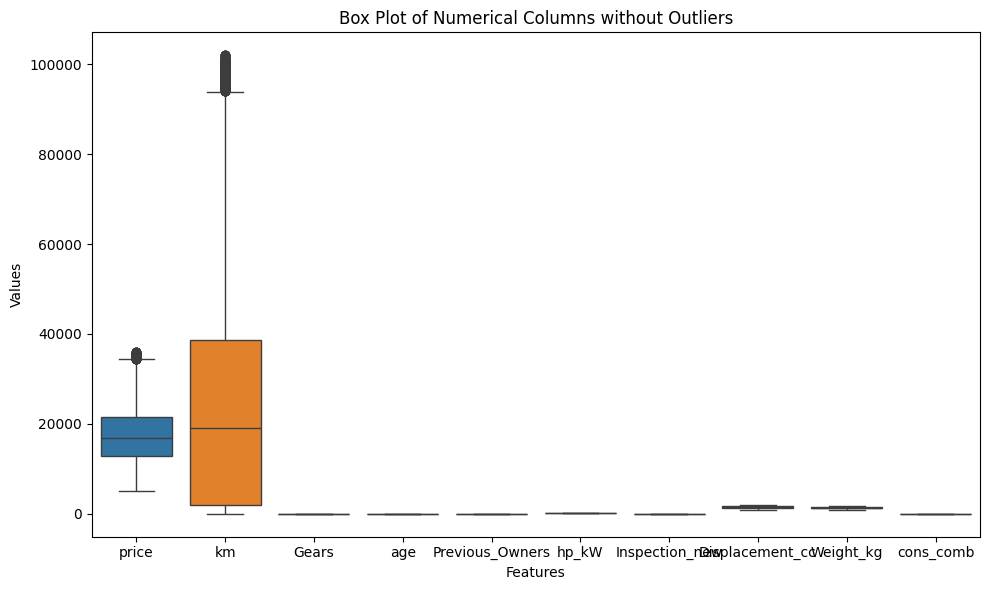

In [11]:
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numerical_columns])
plt.title('Box Plot of Numerical Columns without Outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

In [12]:
data.shape

(12222, 19)

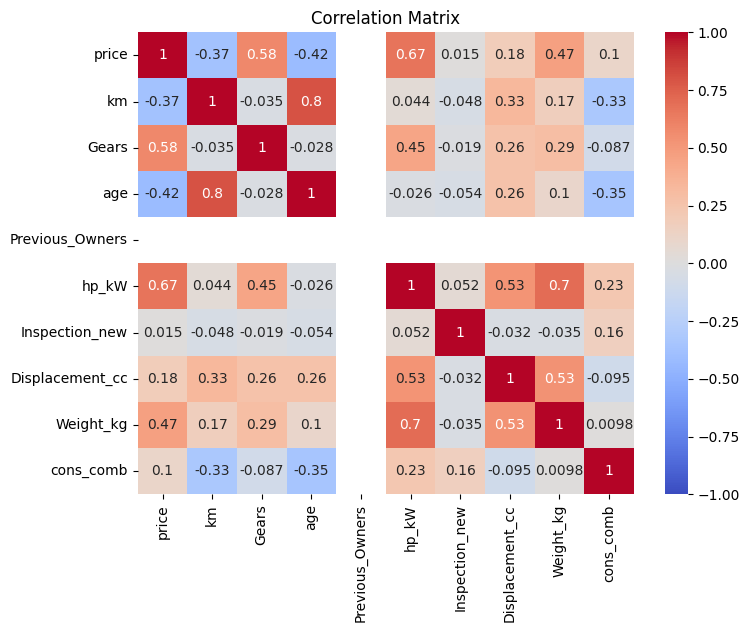

In [13]:
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [14]:
object_cols = data.select_dtypes(include=['object']).columns.tolist()
unique_counts = {col: data[col].nunique() for col in object_cols}
print(unique_counts)

{'make_model': 8, 'body_type': 8, 'vat': 2, 'Type': 5, 'Fuel': 4, 'Paint_Type': 3, 'Upholstery_type': 2, 'Gearing_Type': 3, 'Drive_chain': 3}


In [15]:
data.drop(["km"],axis=1,inplace=True)

In [16]:
object_columns = data.select_dtypes(include=['object']).columns

for column in object_columns:
    unique_values = data[column].unique()
    print(f"{column} : {unique_values}")

make_model : ['Audi A1' 'Audi A2' 'Audi A3' 'Opel Astra' 'Opel Corsa' 'Opel Insignia'
 'Renault Clio' 'Renault Espace']
body_type : ['Sedans' 'Station wagon' 'Compact' 'Van' 'Off-Road' 'Convertible' 'Coupe'
 'Transporter']
vat : ['Price negotiable' 'VAT deductible']
Type : ['Used' "Employee's car" 'New' 'Demonstration' 'Pre-registered']
Fuel : ['Benzine' 'Diesel' 'LPG/CNG' 'Electric']
Paint_Type : ['Metallic' 'Uni/basic' 'Perl effect']
Upholstery_type : ['Cloth' 'Part/Full Leather']
Gearing_Type : ['Automatic' 'Manual' 'Semi-automatic']
Drive_chain : ['front' '4WD' 'rear']


In [17]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

make_model_order = ['Renault Clio', 'Opel Corsa', 'Audi A1', 'Opel Astra', 'Audi A2', 'Renault Espace', 'Audi A3', 'Opel Insignia']
body_type_order = ['Sedans', 'Station wagon', 'Compact', 'Van', 'Off-Road', 'Convertible', 'Coupe', 'Transporter']

oe = OrdinalEncoder(categories=[make_model_order])
oe1 = OrdinalEncoder(categories=[body_type_order])

data['make_model'] = oe.fit_transform(data[['make_model']])
data['body_type'] = oe1.fit_transform(data[['body_type']])

In [18]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
columns=["Gearing_Type"]
data=pd.get_dummies(data,columns=columns)

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['vat'] = le.fit_transform(data['vat'])
data['Type'] = le.fit_transform(data['Type'])
data['Fuel'] = le.fit_transform(data['Fuel'])
data['Paint_Type'] = le.fit_transform(data['Paint_Type'])
data['Upholstery_type'] = le.fit_transform(data['Upholstery_type'])
data['Drive_chain'] = le.fit_transform(data['Drive_chain'])

In [20]:
data.head()

,make_model,body_type,price,vat,Type,Fuel,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
1,2.0,0.0,14500,0,4,0,7,2,1,141,0,0,0,1798,1255,1,5.6,True,False,False
2,2.0,0.0,14640,1,4,1,7,3,1,85,0,0,0,1598,1135,1,3.8,True,False,False
3,2.0,0.0,14500,1,4,1,6,3,1,66,0,0,0,1422,1195,1,3.8,True,False,False
4,2.0,0.0,16790,1,4,1,7,3,1,66,1,0,0,1422,1135,1,4.1,True,False,False
5,2.0,0.0,15090,1,4,1,7,3,1,85,0,0,1,1598,1135,1,3.5,True,False,False


In [21]:
data.shape

(12222, 20)

##Models

In [22]:
X = data.drop(['price'], axis=1)
y = data['price']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

##Linear Regression

In [24]:
lr = LinearRegression()
lr.fit(X_train_s, y_train)
y_pred_lg = lr.predict(X_test_s)
r2 = r2_score(y_test, y_pred_lg)
print(r2)

0.7798612899169982


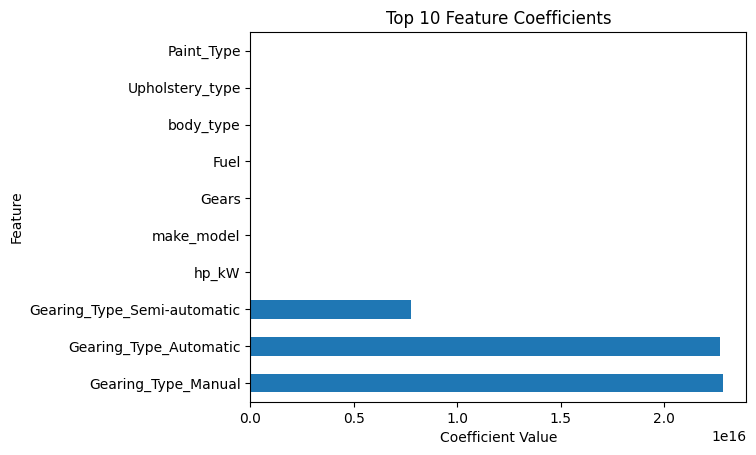

In [25]:
model = LinearRegression()
model.fit(X_train_s, y_train)
coefficients = pd.Series(model.coef_, index=X_train.columns)
coefficients.nlargest(10).plot(kind='barh')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Feature Coefficients')
plt.show()

###KNN

In [26]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_s, y_train)
y_pred_kn = knn.predict(X_test_s)

In [27]:
r2k = r2_score(y_test, y_pred_kn)
print(f'R^2 Score: {r2k}')

R^2 Score: 0.8897448560151383


In [28]:
k_values = range(1, 21)

r2_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_s, y_train)
    y_pred_kn = knn.predict(X_test_s)
    r2K = r2_score(y_test, y_pred_kn)
    r2_values.append(r2K)

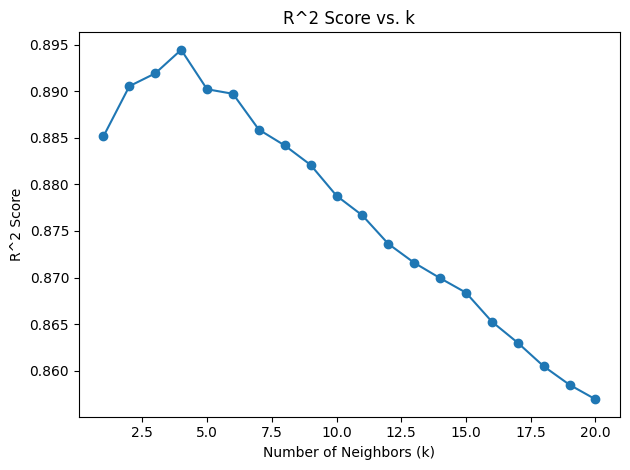

In [29]:
plt.plot(k_values, r2_values, marker='o')
plt.title('R^2 Score vs. k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('R^2 Score')
plt.tight_layout()
plt.show()

##Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_s, y_train)
y_pred_rf = rf_regressor.predict(X_test_s)

In [32]:
r2 = r2_score(y_test, y_pred_rf)
print("R^2 Score:", r2)

R^2 Score: 0.9323107707449841


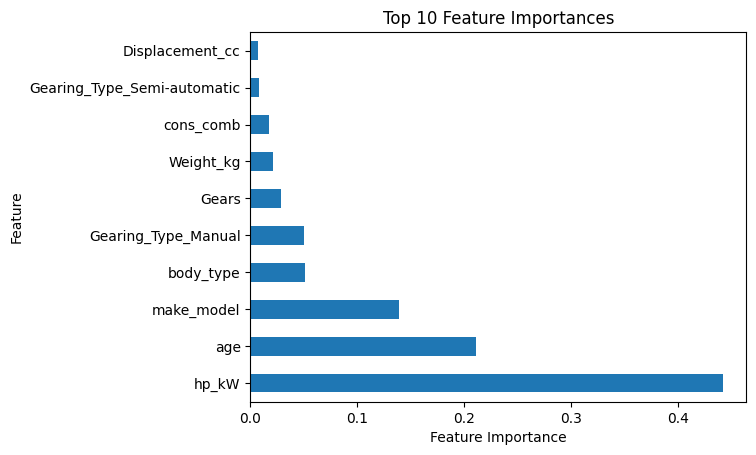

In [33]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_s, y_train)
feature_importances = pd.Series(rf_regressor.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()

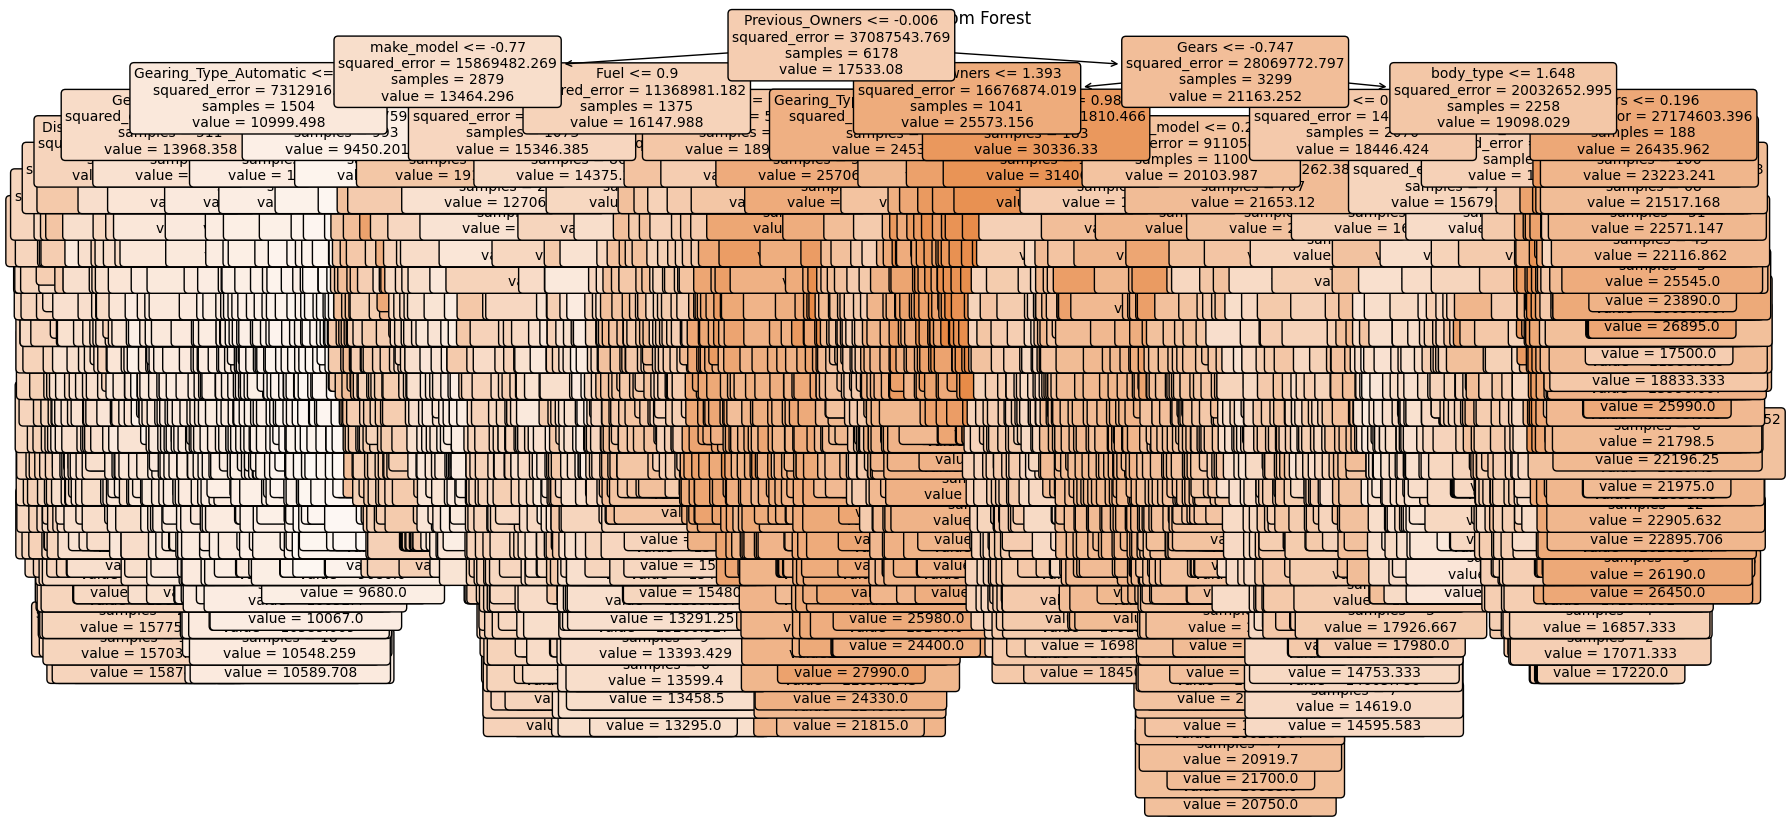

In [39]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
tree_to_plot = rf_regressor.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=data.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

##SVR

In [34]:
from sklearn.svm import SVR

In [35]:
SVR_model = SVR(kernel='linear')
SVR_model.fit(X_train_s, y_train)
y_pred_svr = SVR_model.predict(X_test_s)

In [36]:
r2 = r2_score(y_test, y_pred_svr)
print("R^2 Score:", r2)

R^2 Score: 0.7297619059812513


In [37]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    SVR_model = SVR(kernel=kernel)
    SVR_model.fit(X_train_s, y_train)
    y_pred_svr = SVR_model.predict(X_test_s)
    r2 = r2_score(y_test, y_pred_svr)
    print(f"R^2 Score for {kernel}: {r2}")

R^2 Score for linear: 0.7297619059812513
R^2 Score for poly: 0.11028974013862058
R^2 Score for rbf: 0.09817906832214107
R^2 Score for sigmoid: 0.22342497856672827


In [38]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
def metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

print("Metrics for Linear Rigression:",metrics(y_test, y_pred_lg))
print("Metrics for KNN:",metrics(y_test, y_pred_kn))
print("Metrics for Random forest:",metrics(y_test, y_pred_rf))
print("Metrics for SVR:",metrics(y_test, y_pred_svr))

Metrics for Linear Rigression: (2176.7632315379756, 2837.3089061559967, 0.7798612899169982)
Metrics for KNN: (1484.098445807771, 2287.4390167235147, 0.8569189152797277)
Metrics for Random forest: (964.268704501357, 1573.3241069708579, 0.9323107707449841)
Metrics for SVR: (4278.2842324751455, 5329.054002976228, 0.22342497856672827)
